In [1]:
%load_ext autoreload
%autoreload 2  
from pipeline import loader as lo
from pipeline import classifier as clas
from pipeline import explorer as ex
from pipeline import processor as pro
from pipeline import _util as ut
from pipeline import evaluator as ev
from pipeline import features_generator as fe

# Finacial Distress Prediction ( pipeline skeleton)

## 1. Load Data
### - Load data from csv file
### - Check the data type of each column

In [2]:
df = lo.load()

In [3]:
df.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

## 2. Explore Data

### 1. show the summary statistics of the data

In [4]:
ex.basic_sum(df)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


### 2.show the distribution of each variable

<module 'matplotlib.pyplot' from '/home/pgw/miniconda3/envs/hw2_env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

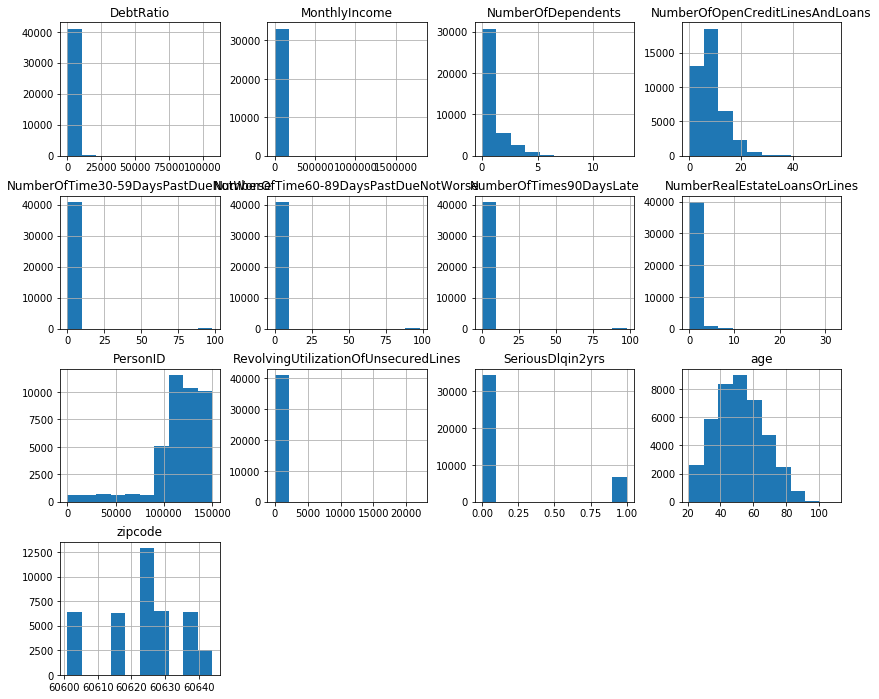

In [5]:
ut.hist_some(df)

### 3. Show the table of pair-wise correlation

In [6]:
cor_table = ex.corr_df(df)
cor_table

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,1.000000,-0.622739,0.004499,0.108533,-0.021010,-0.082598,0.006864,0.019755,0.022669,-0.076856,0.004341,-0.065353,-0.030364
SeriousDlqin2yrs,-0.622739,1.000000,-0.004586,-0.173728,-0.045051,0.149334,-0.013502,-0.032810,-0.039898,0.139609,-0.010641,0.121886,0.065708
RevolvingUtilizationOfUnsecuredLines,0.004499,-0.004586,1.000000,-0.008003,0.006009,-0.001999,0.022250,0.005832,-0.014590,-0.001686,0.004763,-0.001413,0.005342
age,0.108533,-0.173728,-0.008003,1.000000,0.005408,-0.068696,0.038828,0.048138,0.159866,-0.069036,0.049168,-0.063622,-0.211002
zipcode,-0.021010,-0.045051,0.006009,0.005408,1.000000,-0.002424,0.002088,-0.004980,-0.009214,-0.001487,0.003141,-0.001198,-0.001744
NumberOfTime30-59DaysPastDueNotWorse,-0.082598,0.149334,-0.001999,-0.068696,-0.002424,1.000000,-0.011620,-0.015224,-0.070704,0.984465,-0.037863,0.988530,-0.007840
DebtRatio,0.006864,-0.013502,0.022250,0.038828,0.002088,-0.011620,1.000000,-0.022988,0.082791,-0.014790,0.177858,-0.013290,-0.070558
MonthlyIncome,0.019755,-0.032810,0.005832,0.048138,-0.004980,-0.015224,-0.022988,1.000000,0.107100,-0.017954,0.127313,-0.015336,0.060528
NumberOfOpenCreditLinesAndLoans,0.022669,-0.039898,-0.014590,0.159866,-0.009214,-0.070704,0.082791,0.107100,1.000000,-0.098176,0.442776,-0.087154,0.060218
NumberOfTimes90DaysLate,-0.076856,0.139609,-0.001686,-0.069036,-0.001487,0.984465,-0.014790,-0.017954,-0.098176,1.000000,-0.054661,0.992143,-0.015737


<module 'matplotlib.pyplot' from '/home/pgw/miniconda3/envs/hw2_env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

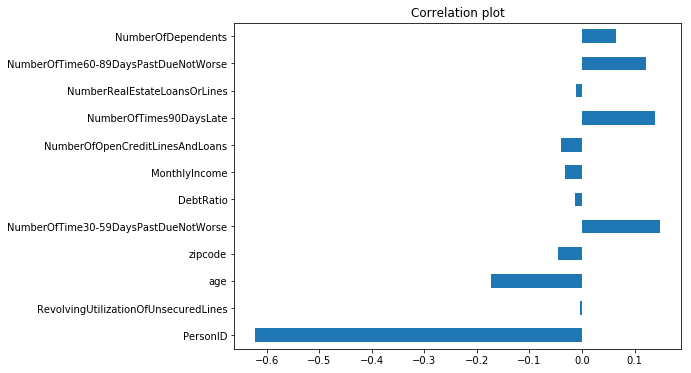

In [7]:
ut.plot_corr(cor_table,'SeriousDlqin2yrs' )

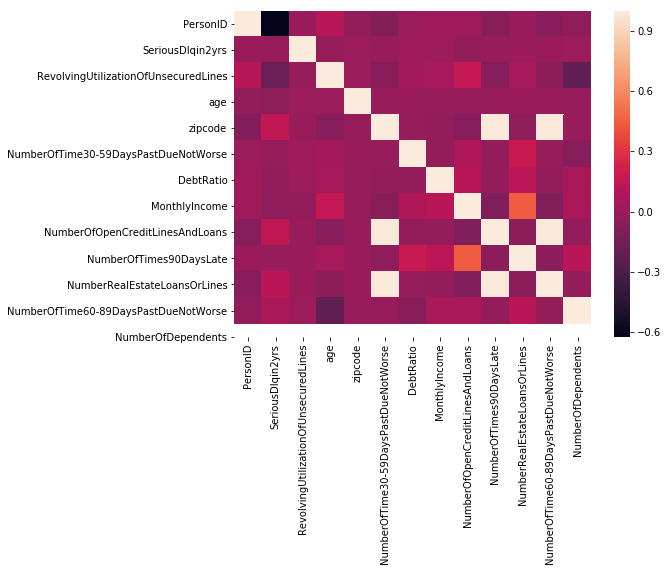

In [8]:
ut.heat_corr(cor_table)

### 4. Find all the outliers using Z-score approach

In [9]:
ex.detect_outlier(df).head(10)

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
32,99302,0,0.007206,67,60601,0,11279.000000,NaN,10,0,4,0,0.0
55,99527,0,0.085054,56,60601,3,7708.000000,NaN,20,0,10,0,0.0
138,100392,0,0.018399,56,60601,0,6814.000000,NaN,8,0,2,0,0.0
262,101758,0,0.107934,62,60601,0,5362.000000,NaN,14,0,5,0,0.0
311,102168,0,0.572363,40,60601,1,1.202771,5340.0,8,1,5,0,1.0
317,102198,0,0.475197,65,60601,0,4293.000000,NaN,11,0,1,0,0.0
329,102346,0,0.441167,65,60601,3,5487.000000,NaN,15,1,2,0,0.0
336,102399,0,0.098413,57,60601,0,0.459448,11700.0,13,0,7,0,1.0
351,102553,0,0.396748,55,60601,0,0.349777,55500.0,19,0,7,0,0.0
398,103044,0,0.679333,64,60601,0,0.947239,6500.0,11,0,5,0,0.0


### 5 Tag all the data as is_out or common data point

In [10]:
temp = df.drop('PersonID',axis =1)
tag_df = ex.tag_out(temp)
tag_df.groupby('is_out').count()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
is_out,,,,,,,,,,,,
False,39459,39459,39459,39459,39459,39459,32181,39459,39459,39459,39459,38483
True,1557,1557,1557,1557,1557,1557,861,1557,1557,1557,1557,1496


## 3. Pre-process Data

In [11]:
pro.fill_median(df,['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'])

In [12]:
df = pro.drop_na(df, 'PersonID')

## 4. Generate Features

In [13]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype='object')

In [14]:
DEP_BINS = [0, 3, 6, 13]
DEP_LABELS = ['dep_small', 'dep_median', 'dep_large']
DEP_CAT = 'dep_category'
after_bin = fe.binize(df, 'NumberOfDependents', DEP_BINS, DEP_LABELS, DEP_CAT)
after_bin.drop('NumberOfDependents', inplace=True, axis=1)

In [15]:
after_dummy = fe.dummize(after_bin, 'zipcode')
after_dummy.drop('zipcode', inplace=True, axis=1)

In [16]:
after_dummy = fe.dummize(df, 'dep_category')
after_dummy.drop('dep_category', inplace=True, axis =1)

## 5. Build Classifier

In [17]:
xs_lst = [item for item in after_dummy.columns if item != 'SeriousDlqin2yrs']
xs_df,y_df = after_dummy[xs_lst], after_dummy['SeriousDlqin2yrs']
x_train, x_test, y_train, y_test = clas.split_data(xs_df, y_df, 0.3, 19870715)

In [18]:
features, support, ranking = clas.select_feature(x_train, y_train)

In [26]:
features

,age,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,dep_category_dep_small,dep_category_dep_median,dep_category_dep_large
22883,43,0,0,3,0,1,0,0
25131,44,1,0,0,0,1,0,0
40151,79,1,0,2,0,1,0,0
6792,31,0,0,1,0,1,0,0
40364,63,0,1,1,0,1,0,0
20179,60,0,0,0,0,1,0,0
15523,71,0,0,0,0,1,0,0
9783,27,2,1,0,1,1,0,0
21542,61,0,0,1,0,1,0,0
21807,59,0,0,0,0,1,0,0


In [37]:
x_train, x_test, y_train, y_test = clas.split_data(xs_df, y_df, 0.3, 0)
xs = x_train[features[0]]
model = clas.build_model(xs, y_train)

In [39]:
pres = ev.pre(model, x_test[features[0]])

In [40]:
ev.get_accu(y_test, pres)

0.8527427874847623

In [41]:
ev.get_report(y_test, pres)

'              precision    recall  f1-score   support\n\n           0       0.85      0.99      0.92     10340\n           1       0.76      0.11      0.20      1965\n\n   micro avg       0.85      0.85      0.85     12305\n   macro avg       0.81      0.55      0.56     12305\nweighted avg       0.84      0.85      0.80     12305\n'

<module 'matplotlib.pyplot' from '/home/pgw/miniconda3/envs/hw2_env/lib/python3.7/site-packages/matplotlib/pyplot.py'>

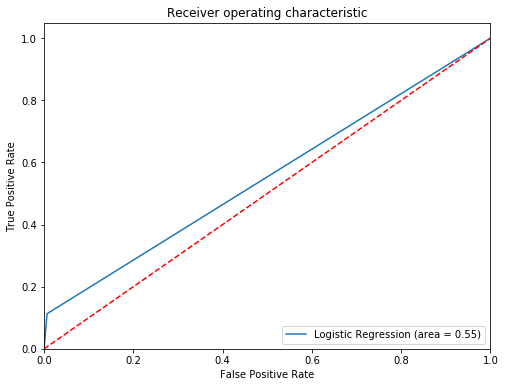

In [42]:
ev.get_roc_auc(y_test, pres)